# Notebook 07: Feature Importance Analysis

Analyze which features are most important for predictions.\
Interpret model decisions for both markets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

## Load Models and Data

In [ ]:
with open('results/models/ames_xgb_model.pkl', 'rb') as f:
    xgb_ames = pickle.load(f)

with open('results/models/malaysia_xgb_model.pkl', 'rb') as f:
    xgb_malaysia = pickle.load(f)

# Load feature names
X_ames = pd.read_csv('data/processed/ames_X_scaled.csv')
X_malaysia = pd.read_csv('data/processed/malaysia_X_scaled.csv')

In [3]:
# Drop 'Median_PSF' from X_malaysia and update related variables
if 'Median_PSF' in X_malaysia.columns:
    X_malaysia.drop(columns='Median_PSF', inplace=True)
    features_malaysia = X_malaysia.columns
    n_feat = X_malaysia.shape[1]
    print(f"Dropped 'Median_PSF'. New shape: {X_malaysia.shape}, n_feat={n_feat}")
else:
    print("'Median_PSF' not found in X_malaysia.")

Dropped 'Median_PSF'. New shape: (1877, 2179), n_feat=2179


## Ames Feature Importance

Top 15 Ames Features:
             Feature  Importance  Importance_Pct
        Overall Qual    0.327746       32.774586
          Total Area    0.097628        9.762816
         Garage Cars    0.085449        8.544858
     Kitchen Qual_TA    0.035410        3.541005
       Exter Qual_TA    0.028357        2.835687
       Central Air_Y    0.020977        2.097718
        MS Zoning_RM    0.019042        1.904170
      Garage Cond_TA    0.019032        1.903206
     Kitchen Qual_Gd    0.013239        1.323939
       Paved Drive_P    0.012922        1.292226
     Low Qual Fin SF    0.012036        1.203641
Neighborhood_Crawfor    0.009048        0.904804
          Fireplaces    0.008868        0.886789
      Bsmt Full Bath    0.008300        0.830031
        Bsmt Qual_Gd    0.007829        0.782890


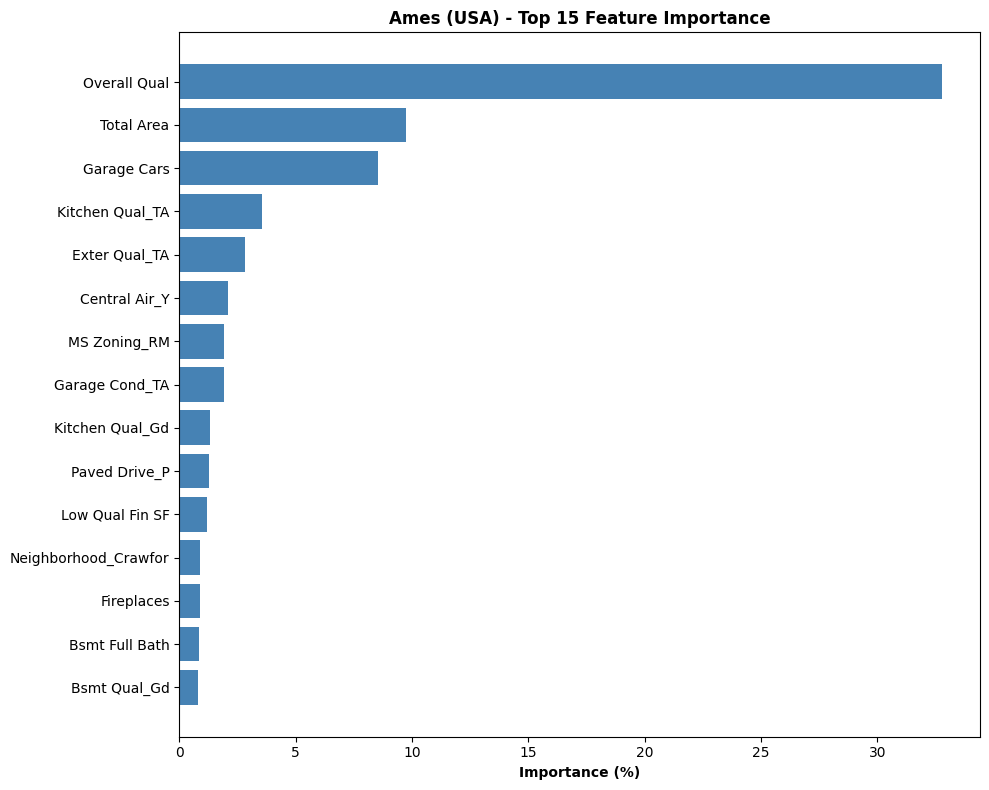

In [4]:
# Get importance
importance_ames = xgb_ames.feature_importances_
features_ames = X_ames.columns

# Create dataframe
importance_df_ames = pd.DataFrame({
    'Feature': features_ames,
    'Importance': importance_ames
}).sort_values('Importance', ascending=False)

# Percentage
importance_df_ames['Importance_Pct'] = (importance_df_ames['Importance'] / importance_df_ames['Importance'].sum()) * 100

print("Top 15 Ames Features:")
print(importance_df_ames.head(15).to_string(index=False))

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(importance_df_ames.head(15)['Feature'], importance_df_ames.head(15)['Importance_Pct'], color='steelblue')
plt.xlabel('Importance (%)', fontweight='bold')
plt.title('Ames (USA) - Top 15 Feature Importance', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**USA (Ames) Drivers:** the graph clearly shows that **Overall Quality** is the single most important factor determining house prices in the US, followed by **Total Area** and **Garage Size**. This confirms that for American buyers, the physical condition and size of the building matter much more than just the neighbourhood name.

## Malaysia Feature Importance

Malaysia Top 30 Features:
                         Feature  Importance  Importance_Pct
                       Type_Flat    0.084118        8.411822
                  State_Selangor    0.031610        3.160982
                     State_Kedah    0.020542        2.054226
                     Area_Tebrau    0.015567        1.556685
                Tenure_Leasehold    0.014704        1.470389
 Area_Iskandar Puteri (Nusajaya)    0.012823        1.282316
      Type_Terrace House, Semi D    0.012616        1.261618
                    State_Pahang    0.012558        1.255833
                Area_Subang Jaya    0.011083        1.108274
              State_Kuala Lumpur    0.011030        1.102993
                     State_Perak    0.010948        1.094838
                   Area_Serendah    0.010747        1.074712
                    State_Penang    0.010550        1.054957
               Area_Port Dickson    0.010029        1.002925
                Area_Johor Bahru    0.009304        0.93043

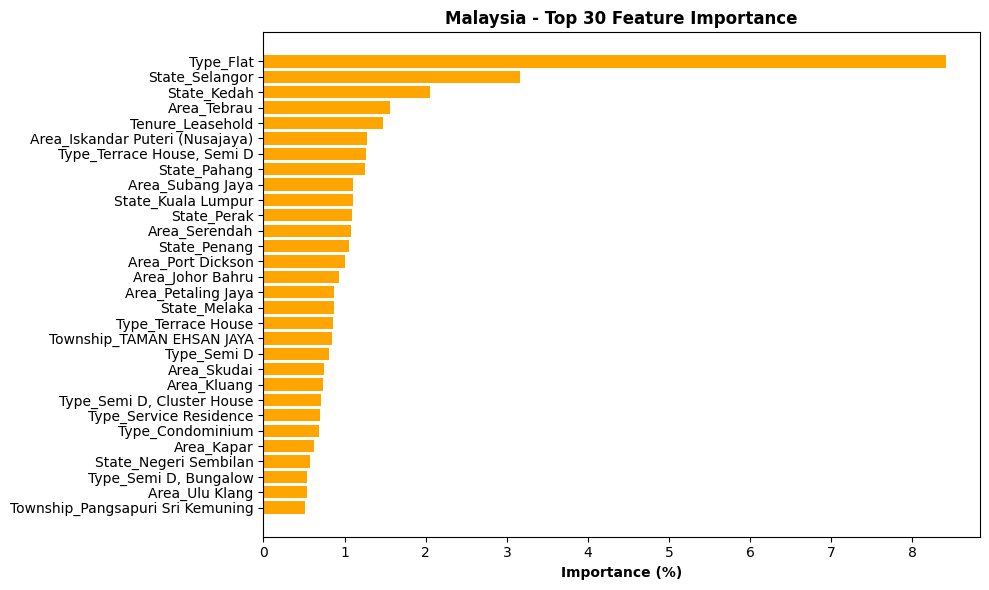

In [5]:
# Get importance
importance_malaysia = xgb_malaysia.feature_importances_
features_malaysia = X_malaysia.columns

# Create dataframe
importance_df_malaysia = pd.DataFrame({
    'Feature': features_malaysia,
    'Importance': importance_malaysia
}).sort_values('Importance', ascending=False)

# Percentage
importance_df_malaysia['Importance_Pct'] = (importance_df_malaysia['Importance'] / importance_df_malaysia['Importance'].sum()) * 100

print("Malaysia Top 30 Features:")
importance_df_malaysia_30 = importance_df_malaysia.head(30)
print(importance_df_malaysia_30.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(importance_df_malaysia_30['Feature'], importance_df_malaysia_30['Importance_Pct'], color='orange')
plt.xlabel('Importance (%)', fontweight='bold')
plt.title('Malaysia - Top 30 Feature Importance', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Malaysia Drivers:** in the absence of specific details like house size or condition, the model relies almost entirely on **Location (State & Area)** and **Property Type** (e.g., whether it is a Flat or a Terrace House). The prominence of specific states like **Selangor** and **Kedah** highlights that in this dataset, where the property is located is the primary driver of its value.

## Comparative Analysis

In [6]:
print("FEATURE IMPORTANCE COMPARISON")
print("\nAmes (USA) - Top 5:")
for i, row in importance_df_ames.head(5).iterrows():
    print(f"  {row['Feature']}: {row['Importance_Pct']:.1f}%")

print("\nMalaysia - Top 5:")
for i, row in importance_df_malaysia.head(5).iterrows():
    print(f"  {row['Feature']}: {row['Importance_Pct']:.1f}%")

# Compute summary values to avoid long inline f-strings and accidental line breaks
ames_top5_sum = importance_df_ames.head(5)['Importance_Pct'].sum()
mal_top1_feature = importance_df_malaysia.head(1)['Feature'].iloc[0]
mal_top1_pct = importance_df_malaysia.head(1)['Importance_Pct'].iloc[0]

print("\nKey Insight:")
print(f"  Ames dataset after feature engineering has {len(features_ames)} features → Top 5 features explain ~{ames_top5_sum:.1f}%")
print(f"  Malaysia dataset after feature engineering has {n_feat} features → Although {mal_top1_feature} explains ~{mal_top1_pct:.1f}% of the total \nimportance, all features are relatively important (spread more evenly)")

FEATURE IMPORTANCE COMPARISON

Ames (USA) - Top 5:
  Overall Qual: 32.8%
  Total Area: 9.8%
  Garage Cars: 8.5%
  Kitchen Qual_TA: 3.5%
  Exter Qual_TA: 2.8%

Malaysia - Top 5:
  Type_Flat: 8.4%
  State_Selangor: 3.2%
  State_Kedah: 2.1%
  Area_Tebrau: 1.6%
  Tenure_Leasehold: 1.5%

Key Insight:
  Ames dataset after feature engineering has 268 features → Top 5 features explain ~57.5%
  Malaysia dataset after feature engineering has 2179 features → Although Type_Flat explains ~8.4% of the total 
importance, all features are relatively important (spread more evenly)
